In [250]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [251]:
# Load the dataset
df = pd .read_csv("Heart Disease data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [252]:
df.shape

(1025, 14)

In [253]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [255]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [256]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [257]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presence'

In [258]:
# adding new column to dataset of converted data

df['heart_disease'] = df['target'].apply(heart_diseases)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence


In [259]:
# to count the number of people having heart diseases and NOT having heart diseases

having_hd = df.groupby('heart_disease')['target'].count()
having_hd

heart_disease
absence     499
presence    526
Name: target, dtype: int64

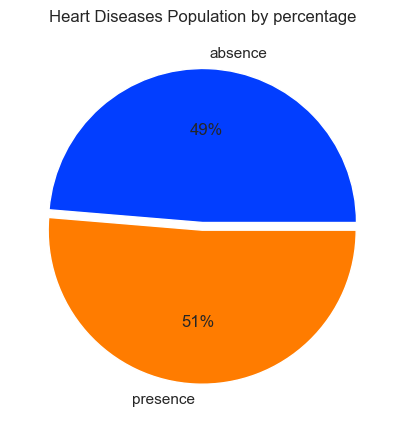

In [260]:
# plot the bar chart of above using matplotlib and seaborn

plt.figure(figsize=(5,5))
clrs = sns.color_palette('bright')
explode = [0, 0.05]
plt.pie(having_hd, labels=['absence','presence'], autopct='%0.0f%%', colors=clrs, explode=explode)
plt.title('Heart Diseases Population by percentage')
plt.show()

# From the above observation, people having heart diseases (51%) are lesser than the people who do not have heart diseases(49%)

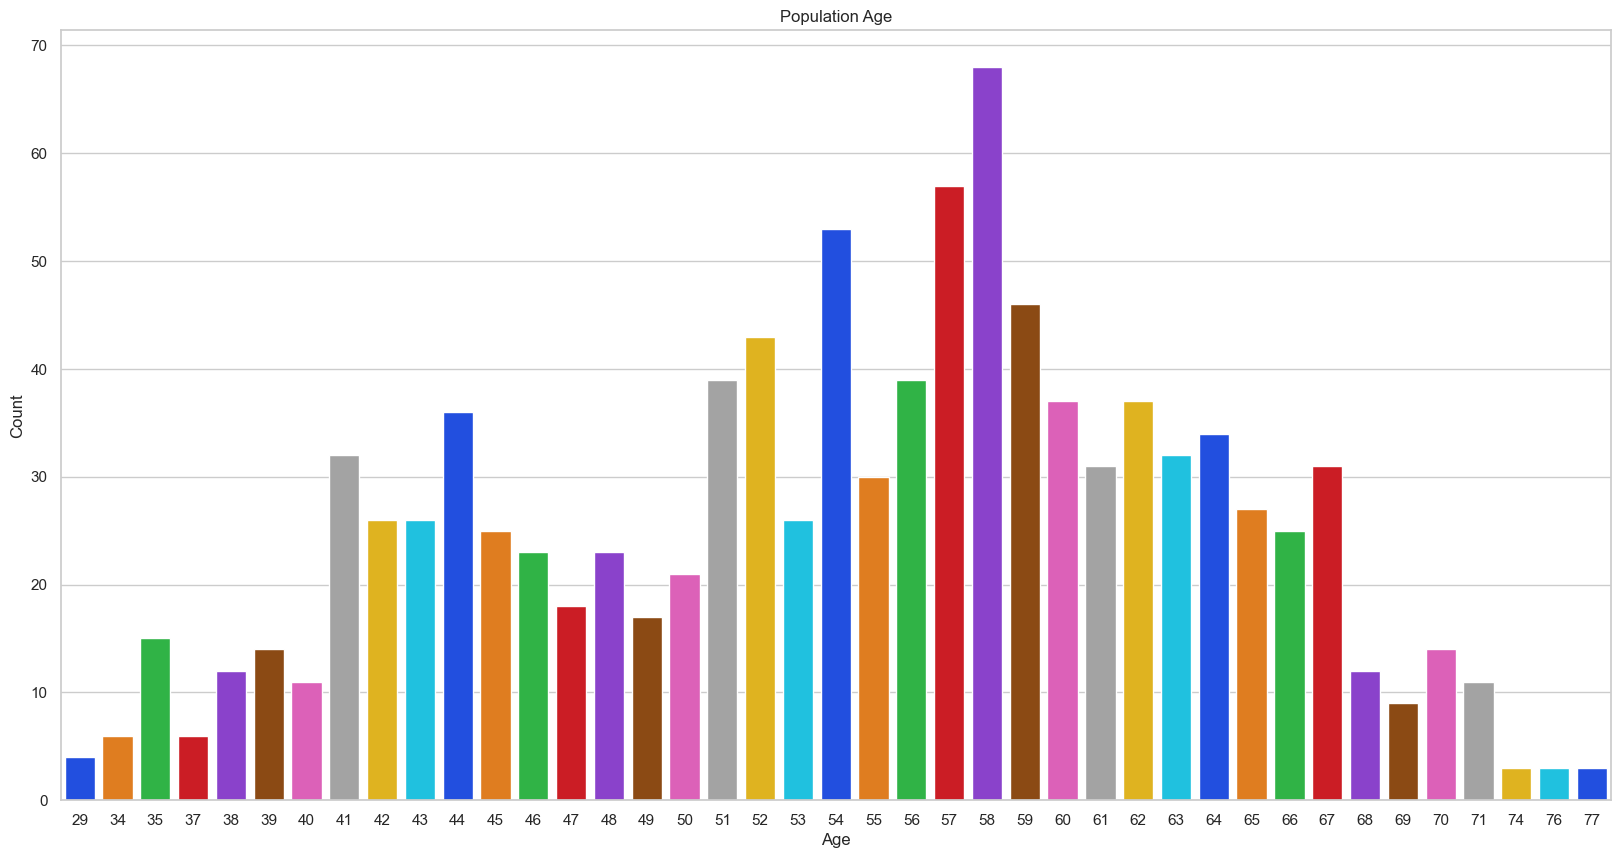

In [261]:
# plotting countplot of population age using matplotlib and seaborn

plt.figure(figsize=(20,10))
plt.title('Population Age')
sns.countplot(x='age', data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# We can observe the count of population according to the their age eg. young, middle-age and elder people

In [262]:
# To find the minimum, maximum and average of the population age using statistical analysis

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

The minimum age is 29
The maximum age is 77
The average age is 54.43


In [263]:
# To divide the population age in different categories

young_age = df[(df['age']>=29) & (df['age']<40)]
middle_age = df[(df['age']>=40) & (df['age']<55)]
old_age = df[(df['age']>55)]
print(f"Number of young age people = {len(young_age)}")
print(f'Number of middle age people = {len(middle_age)}')
print(f'Number of old age people = {len(old_age)}')

Number of young age people = 57
Number of middle age people = 419
Number of old age people = 519


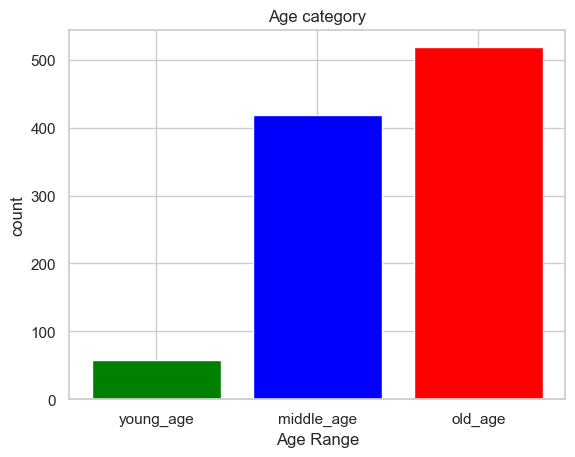

In [264]:
# Bar plot using matplotlib and seaborn for different categories of population age

cat = ['young_age','middle_age','old_age']
_count = [len(young_age), len(middle_age), len(old_age)]
plt.bar(cat, _count, color=['green', 'blue','red'])
plt.title('Age category')
plt.xlabel('Age Range')
plt.ylabel('count')
plt.show()

# From the above plot, we observed that old age population is more than the middle age and young age population. And there is least population of young age.

In [265]:
# converting numerical data into categorical data 

def age_range(row):
    '''converting population age into range of age'''
    if row>=29 and row<40:
        return 'youngAge'
    elif row>=40 and row<55:
        return 'middleAge'
    else:
        return 'oldAge'

In [266]:
# applying converted data into our dataset

df['ageRange'] = df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge


In [267]:
# converting numerical data into categorical data 

def people_sex(row):
    if row==1:
        return 'male'
    else:
        return 'female'

In [268]:
# applying converted data into our dataset

df['gender'] = df['sex'].apply(people_sex)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge,female


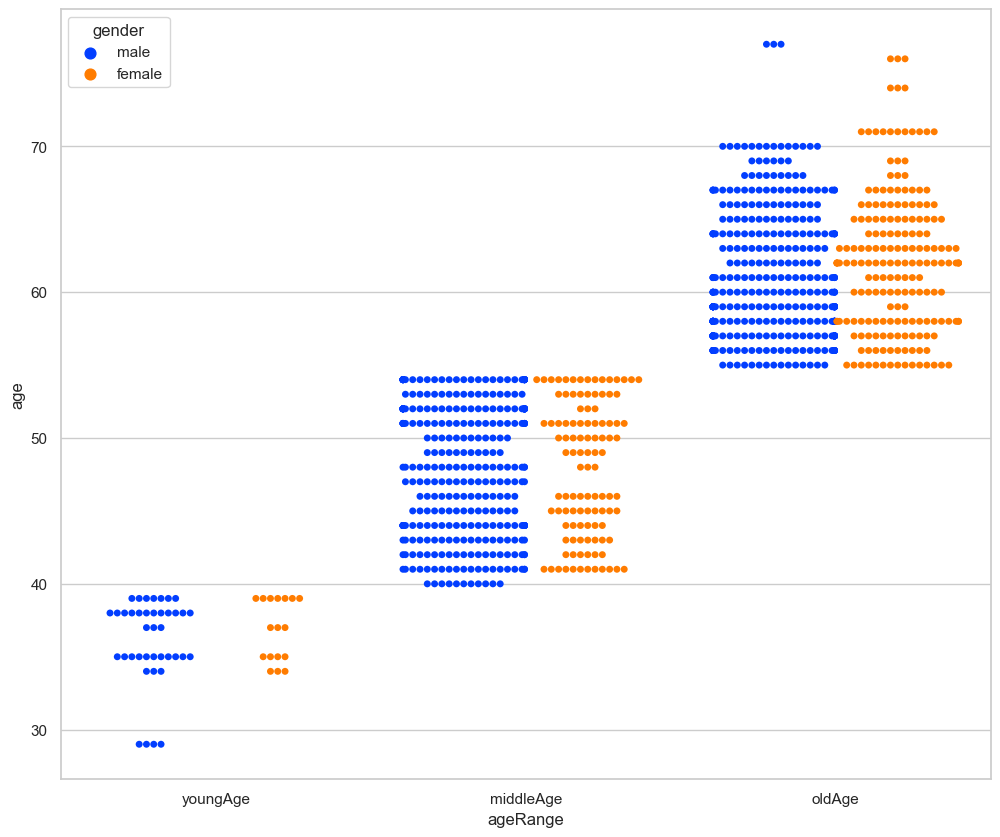

In [269]:
# Scatter plot creation Age category vs gender using matplotlib

plt.figure(figsize=(12,10))
x=df.ageRange
y=df.age
sns.set(style='whitegrid', palette='bright')
sns.swarmplot(x, y, hue='gender', data=df, dodge=True, order = ['youngAge', 'middleAge', 'oldAge'])
plt.show()

# In the given dataset, number of male population is more than the female population in each age group.

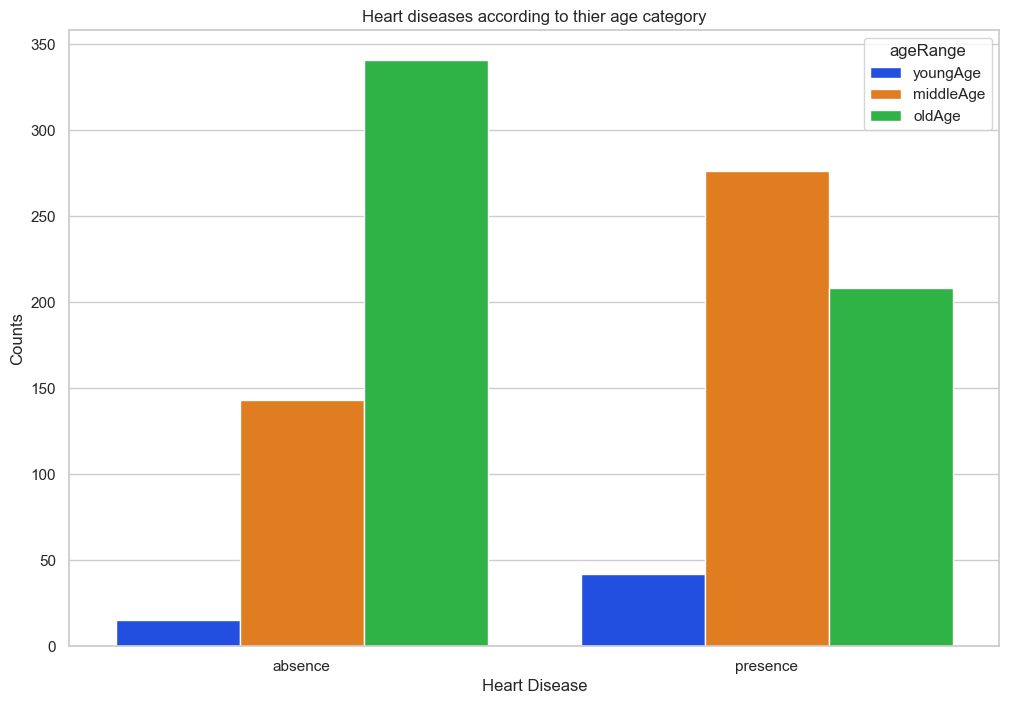

In [270]:
# count plot for heart diseases according to thier age category

plt.figure(figsize=(12,8))
hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Heart diseases according to thier age category")
sns.countplot(x='heart_disease', hue='ageRange', data=df, hue_order=hue_orders, palette='bright')
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

# Middle age people are most affected by Heart disease and young age people are rarely affected.

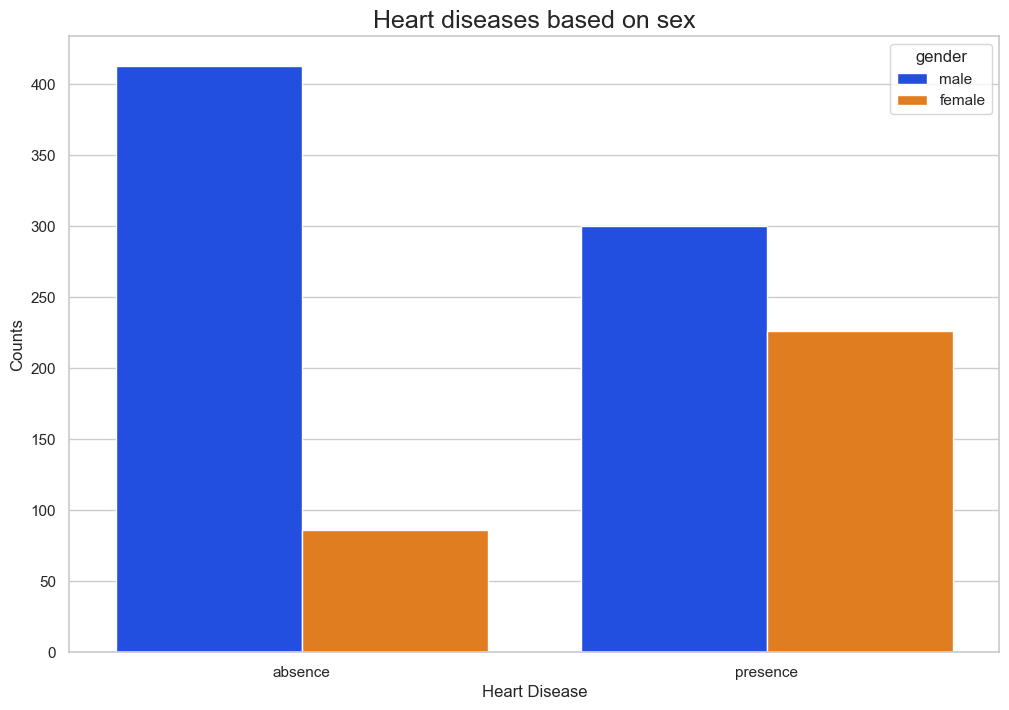

In [271]:
# count plot for heart diseases based on sex

plt.figure(figsize=(12,8))
plt.title("Heart diseases based on sex", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='gender', data=df, palette="bright")
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

# From above graph, it is observed that there are more number of males affected by heart diseases comparison to females.

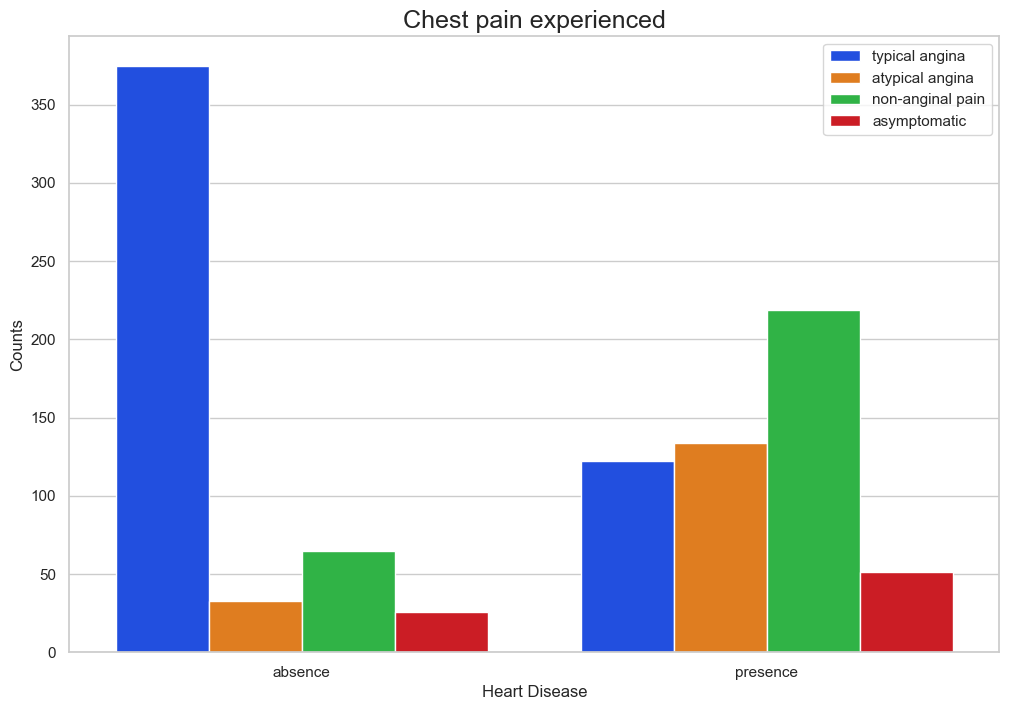

In [272]:
# count plot based on chest pain experienced

plt.figure(figsize=(12,8))
# hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Chest pain experienced", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='cp', data=df, palette="bright")
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

# It is observed that people having non-anginal chest pain have higher chance of heart diseases.

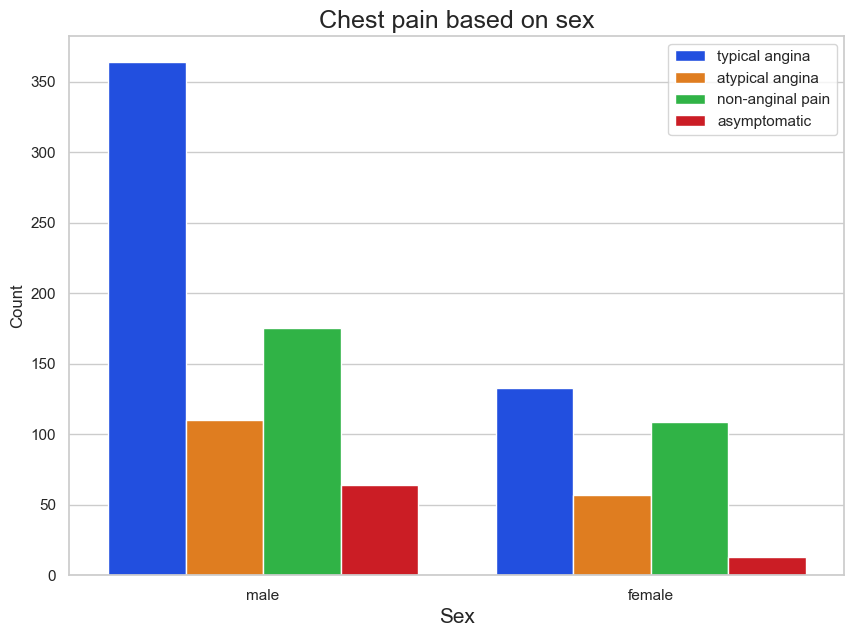

In [273]:
# Count plot for chest pain based on gender

plt.figure(figsize=(10,7))
plt.title("Chest pain based on sex", fontsize=18)
sns.countplot('gender', hue='cp', data=df, palette='bright')
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Count')
plt.show()

# It is observed that higher number of males are suffering from typical angina chest pain.

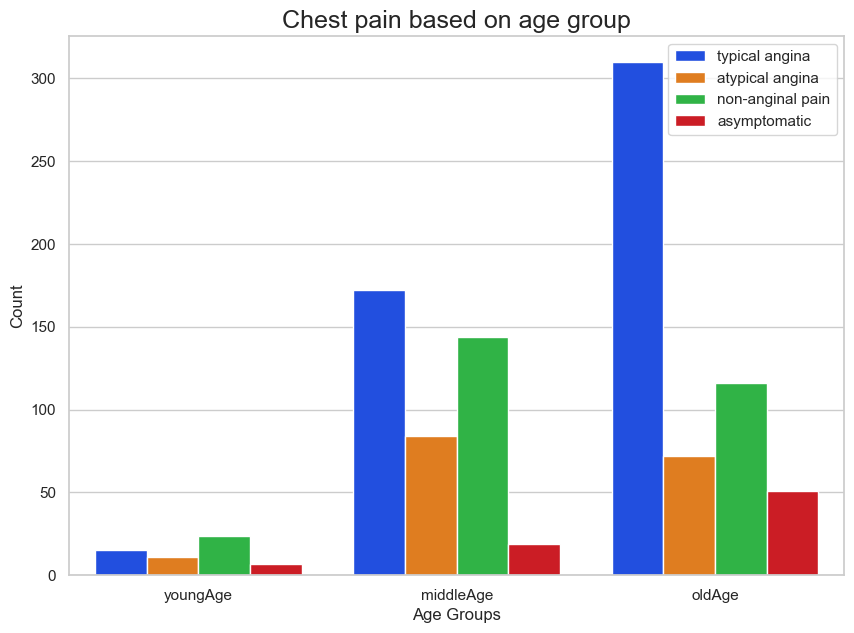

In [274]:
# Count plot for chest pain vs age group using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title("Chest pain based on age group", fontsize=18)
sns.countplot(x=df['ageRange'], hue='cp', data=df, palette='bright', order=['youngAge', 'middleAge', 'oldAge'])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

# It seems that old age group have very high typical angina chest pain.

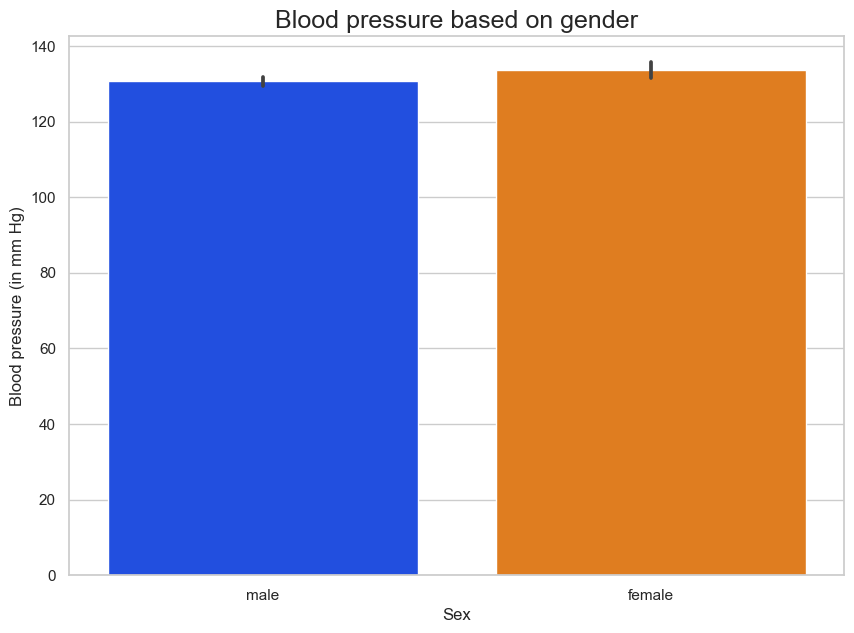

In [275]:
# Bar graph for Restin blood pressure(trestbs)(in mm Hg) based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure based on gender', fontsize=18)
sns.barplot(x='gender', y='trestbps', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Blood pressure (in mm Hg)')
plt.show()

# It is observed that Person's Resting Blood Pressue is almost same for males and females.

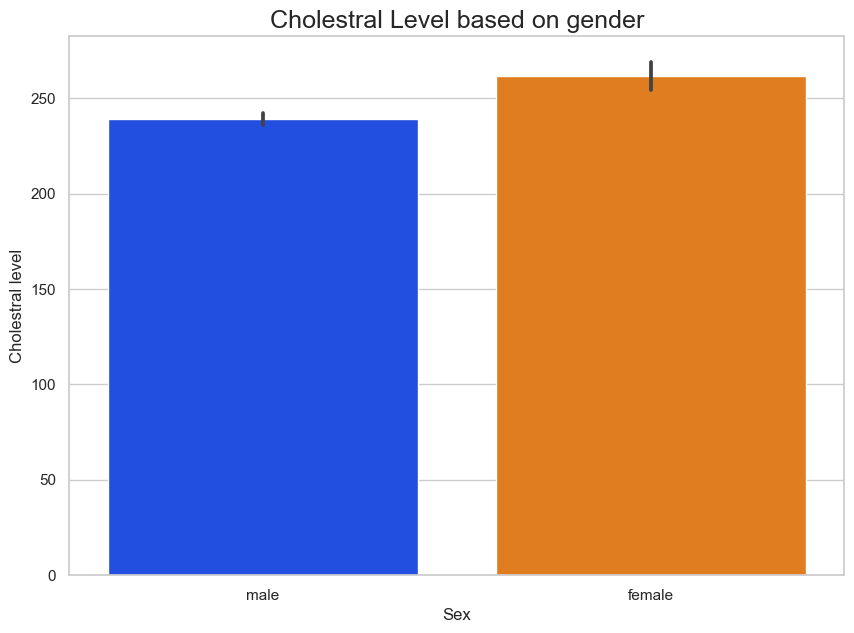

In [276]:
# Bar graph for Cholestral level based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level based on gender', fontsize=18)
sns.barplot(x='gender', y='chol', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Cholestral level')
plt.show()

# Cholestral level is little bit more in females as compared to males.

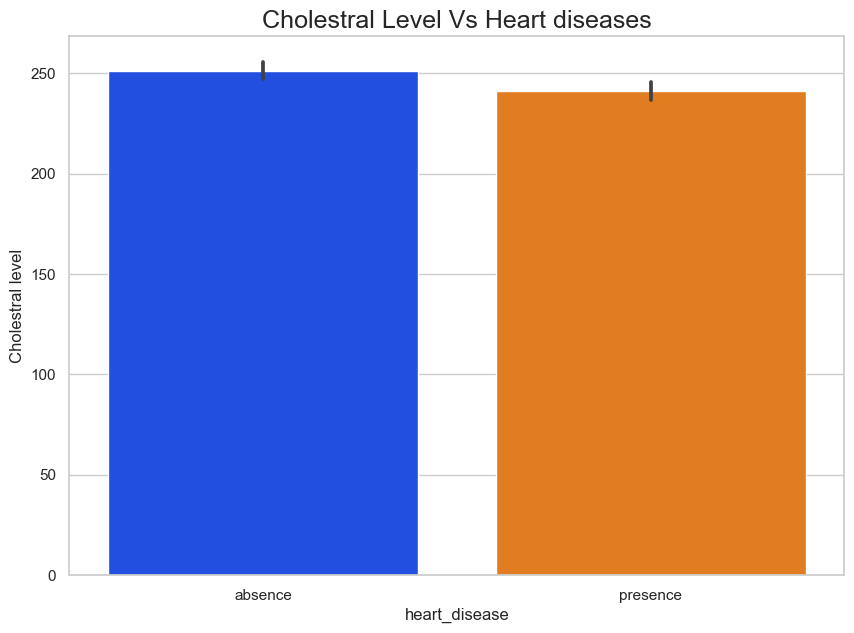

In [277]:
# Bar graph for Cholestral level vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='chol', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Cholestral level')
plt.show()

# Person having high cholestral level having high chance of heart diseases.

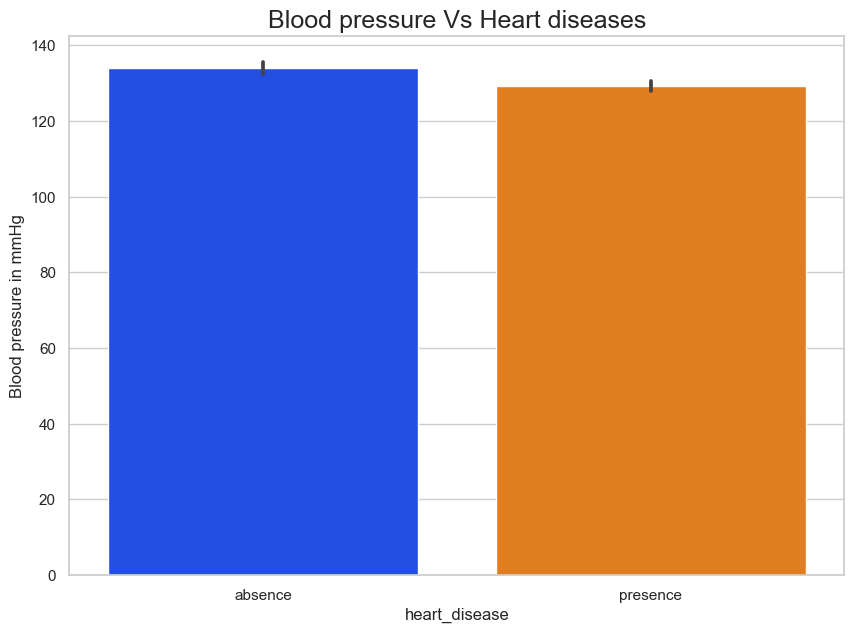

In [278]:
# Bar graph for Blood pressure vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='trestbps', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Blood pressure in mmHg')
plt.show()

# Higher blood pressure leads to high chances of heart diseases.

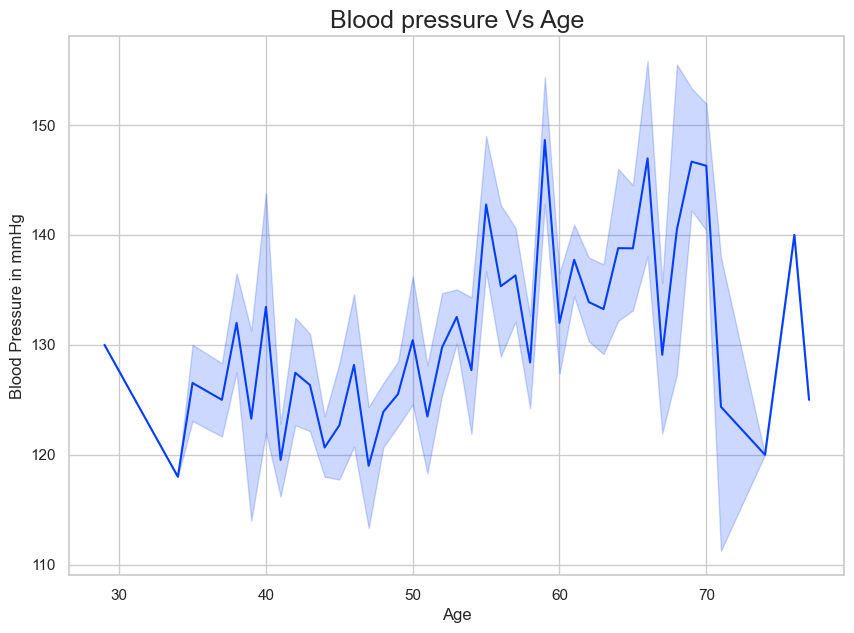

In [279]:
# Line plot for blood pressue vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Age', fontsize=18)
sns.lineplot(x='age', y='trestbps',data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Blood Pressure in mmHg')
plt.show()

# Here we observed that the blood pressure is normal from 30 to 50 and after 50 it increases gradually to age of 60. And after age of 60 it is fluctuating drastically.

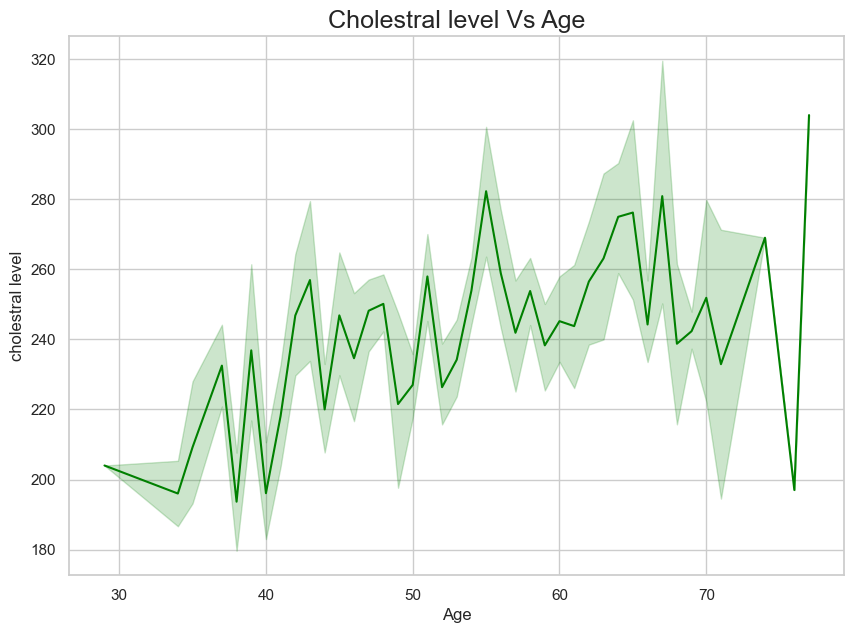

In [280]:
# Line plot for cholestral level vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral level Vs Age', fontsize=18)
sns.lineplot(x='age', y='chol',data=df, color='green')
plt.xlabel('Age')
plt.ylabel('cholestral level')
plt.show()

# Cholestral level is start increasing at the age of 50.

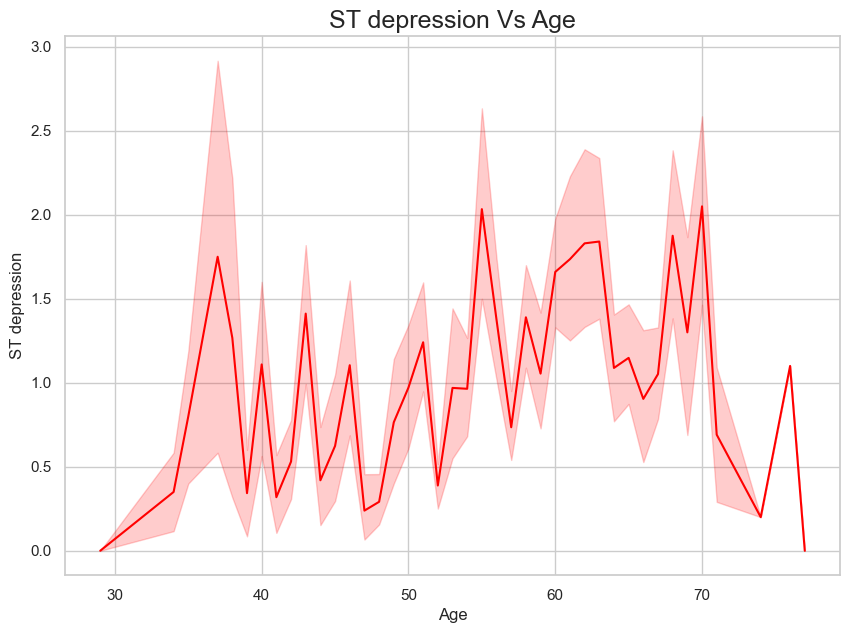

In [281]:
# Line plot for ST depression vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST depression Vs Age', fontsize=18)
sns.lineplot(x='age', y='oldpeak',data=df, color='red')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.show()

# Depression level is quite high in the age group of 30 to 40 and 55 to 70. And in the age group of 40 to 55, it remains stable.

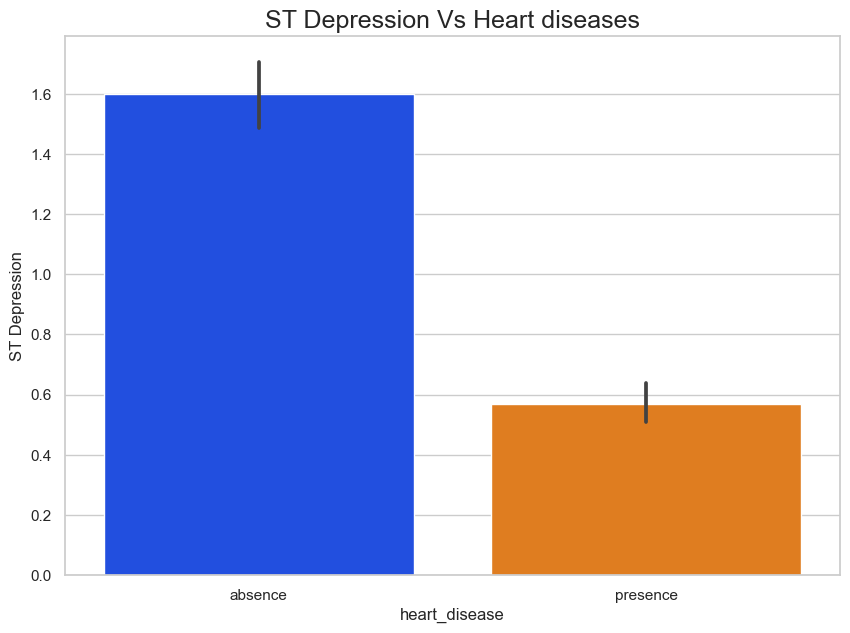

In [282]:
# Bar graph for ST Depression vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('ST Depression')
plt.show()

# People with high ST depression having lower chances of Heart diseases.

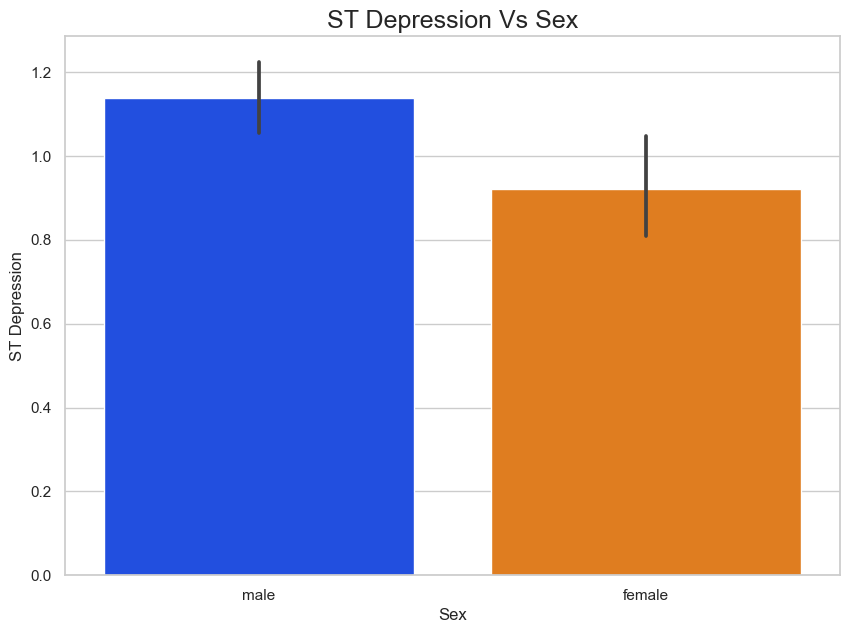

In [283]:
# Bar graph for ST Depression vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Sex', fontsize=18)
sns.barplot(x='gender', y='oldpeak', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('ST Depression')
plt.show()

# It is observed that more number of males are prone to ST Depression as compare to females.

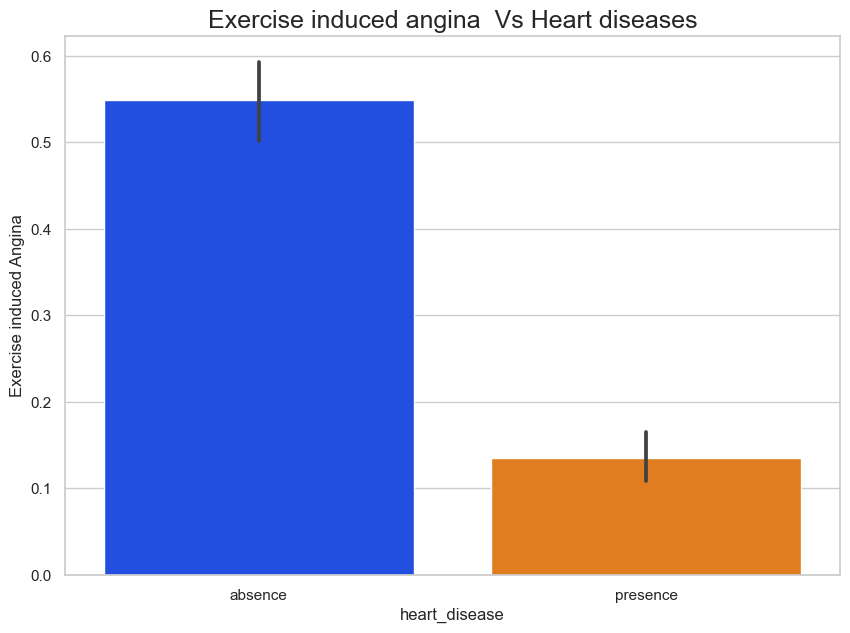

In [284]:
# Bar graph for exercise induced Angina vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced angina  Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='exang', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Exercise induced Angina')
plt.show()

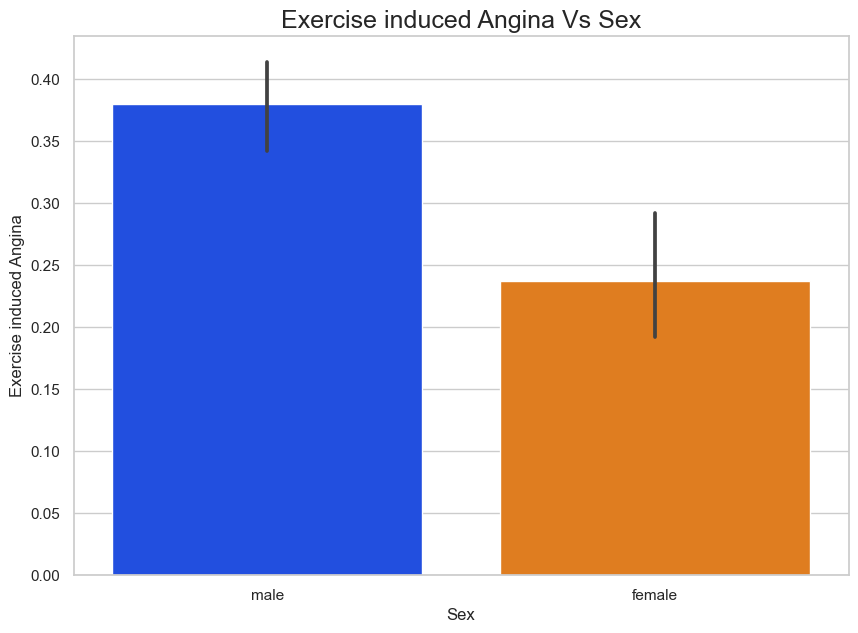

In [285]:
# Bar graph for Exercise induced Angina vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced Angina Vs Sex', fontsize=18)
sns.barplot(x='gender', y='exang', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Exercise induced Angina')
plt.show()

# Male having high exercise induced Angina.

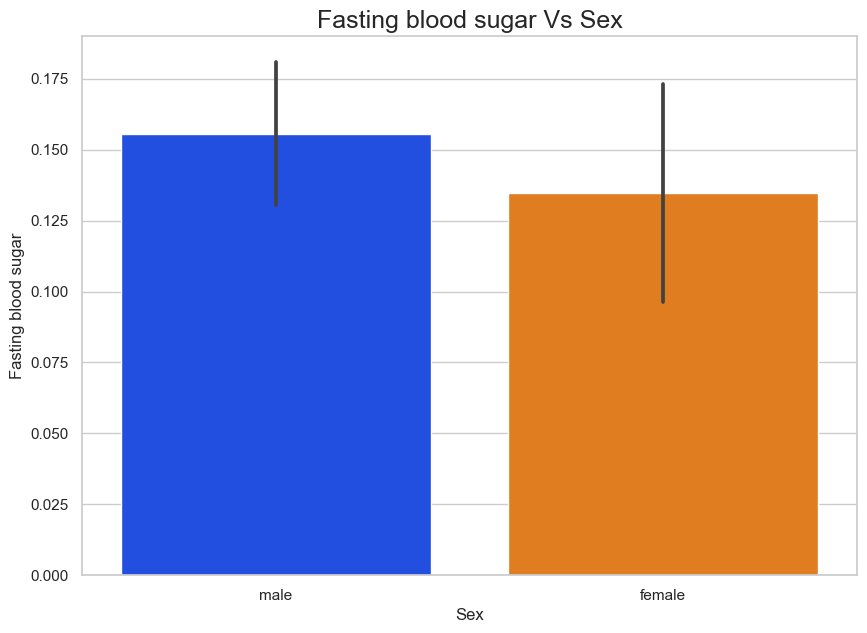

In [286]:
# Bar graph for Fasting blood sugar vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Fasting blood sugar Vs Sex', fontsize=18)
sns.barplot(x='gender', y='fbs', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Fasting blood sugar')
plt.show()

# It is observed that males having high fasting blood pressure>120mg/dl

<AxesSubplot:>

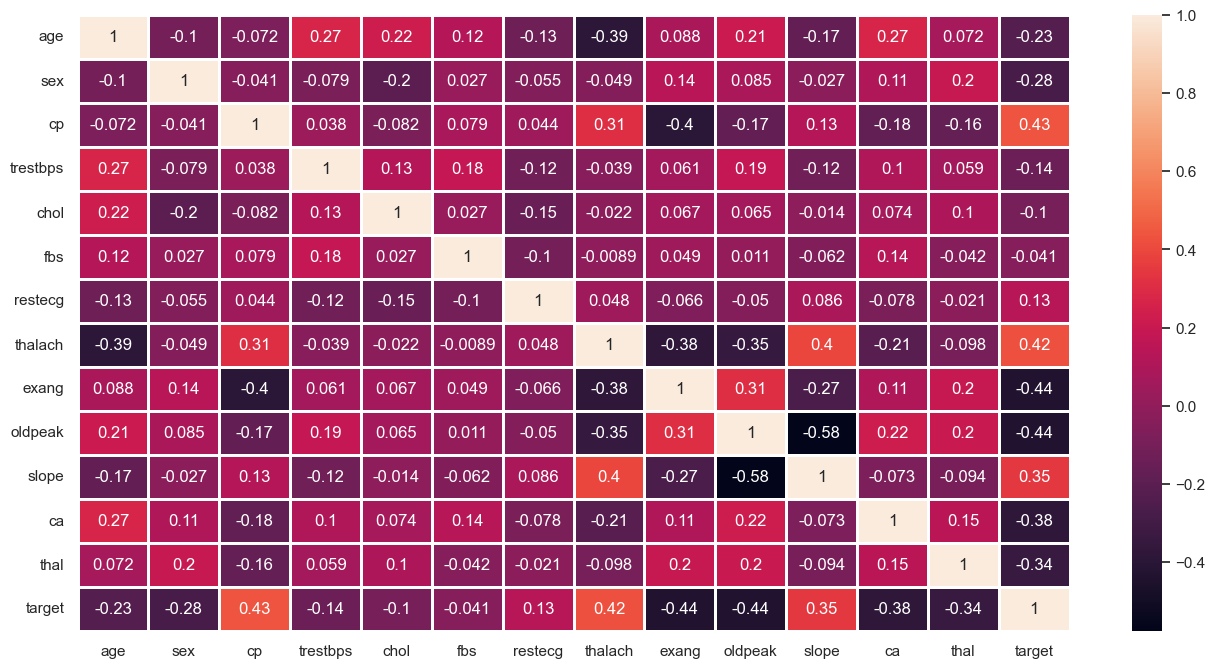

In [287]:
# Heatmap usng seaborn

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, linewidths=2, linecolor='white')

In [288]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge,female


In [289]:
# exporting final dataset to as csv file for Dashboarding in Power BI

#df.to_csv("Heart_Disease_cleaned_data.csv", index=False)